<a href="https://colab.research.google.com/github/AryanShukla2006/Binary-Classification-Model/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## pytorch workflow

* data (preparing and loading)
* build model
* fitting the model to data(training)
* making predictions and evaluating
* saving loading and then deploying

In [ ]:
import torch
from torch import nn         # nn contains all the building blocks for graphs
import matplotlib.pyplot as plt

# Data (preparing and loading)

inputs can be anything which we can represent in tensors or numerical representaions

so we create some *known* data using linear regression fromula

In [ ]:
# we'll use a linear regression formula to make a straight line with known parameter

weight = 0.7
bias = 0.3

# linear regressian : Y = a + bX      in neural networks we consider weight = b and bias = a


# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# no of samples = 50
len(X),len(y)

(50, 50)

## splitting data into training, validation and test set

 we dont need validation set always it is needed in complex models


se lets create the training and test set

In [ ]:
# craete a train/test split
# usually we create a 80/20 train/test split so

# creating a training set
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split] , y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train),len(y_train)           # 40 training samples and rest 10 testing samples

(40, 40)

In [ ]:
# visualizing the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

#plots training data , test data and compares predictions.


  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training_data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing_data")

  # Are there predictions
  if predictions is not None :
    #plot predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4 , label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});



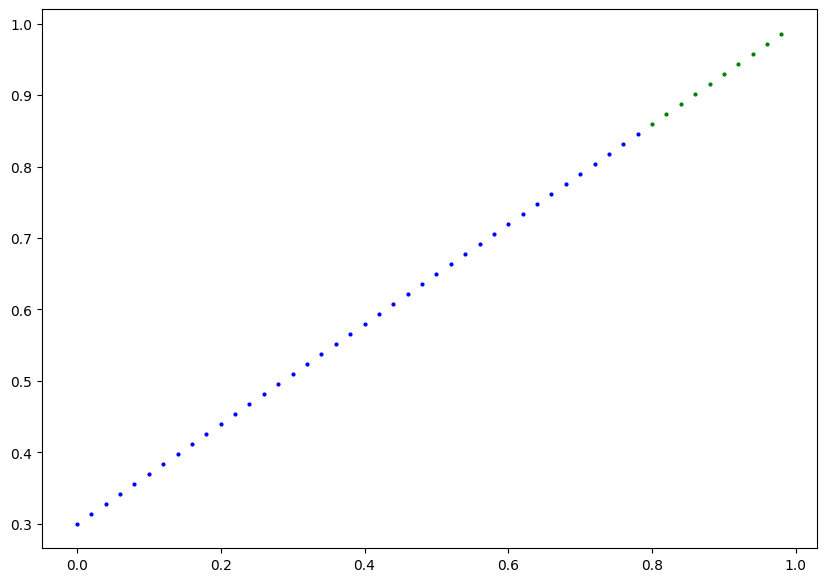

In [ ]:
plot_predictions();

## 2. Build Model

## What our model does

* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent the ideal values

Through two main algorithms
* Gradient descent
* Back propogation

In [ ]:
# Creating a linear regression model class

class LinearRegressionModel(nn.Module):                                     # almost everything in PyTorch inherits from nn.module so it has a lot in built features
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,                               #starting with a randoom weight
                                            requires_grad=True,             # for us to update the gradient descent
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))

  # forward method to define the computation in the model
  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.weight * x + self.bias

### pyTorch model building essentials

* torch.nn - contains all of the building for computational graphs
* torch.nn.Parameter -  what parameters will model try and learn, we wont neccessarily need to do this torch.nn will set these for us
* torch.nn.module - The base class for all neural network modules , if you subclass it you should overwrite firward()
* torch.optim - helps in gradient descent



use Pytorch cheatsheet link-https://pytorch.org/tutorials/beginner/ptcheat.html

 ### Checking the contents of the above model

 we can check our model parameters using .parameters()

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()
print(model_0)

#check out the parameters
list(model_0.parameters())

LinearRegressionModel()


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### making predictions using torch.inference_mode()

to check our models predictive power , so it predicts y_test based on X_test.
When we pass data through our model its going to forward it through forward() method

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
with torch.inference_mode():       # preferable as it tracks gradient tracking creting predictions more faster as it removes useless data
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
# these are the prediction values and

X_test, y_test

# these are the ideal value

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

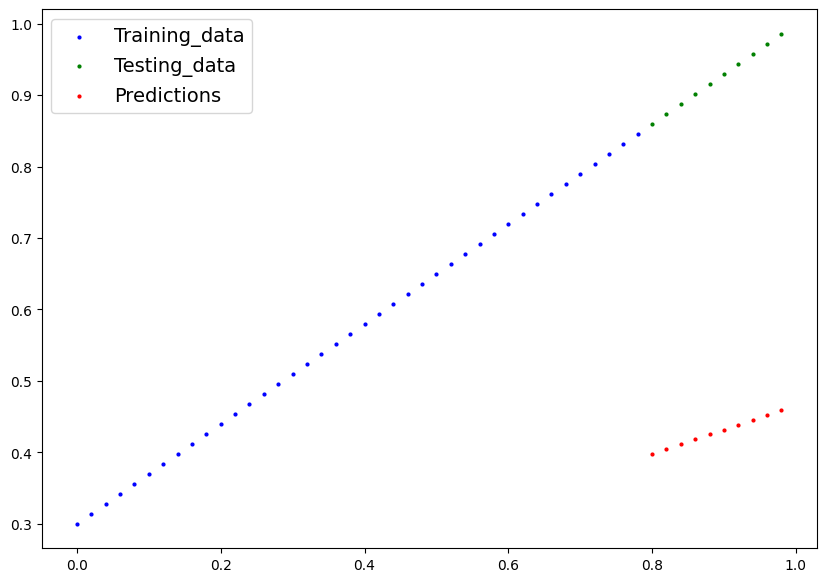

In [ ]:
plot_predictions(predictions = y_preds)

###notice how these are not accurate

this is because out model is not trained yet

## 3. Train Model

We use how poor or inaccurate our predections are is to use a loss/cost funtion

things we need to train

* Loss/cost function
* optimizer  (handles gradient desecnt):
    inside th optimizer there are two parameter:
    * params - The model parameters you would like to optimize
    * lr (learning rate) - decides how big/small the optimizer changes the parameterswith elach step
specifically for pytorch we need
* A training loop
* A testing loop

information about tyoes of loss functions and their uses link:https://pytorch.org/docs/stable/nn.html#loss-functions

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer  (SGD = stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)  # learing rate = possibly the most important hyper parameter that you can set


### Building a training loop and a testing loop in pytorch

A couple of thing we need in a training loop :
0. Loop through the data
1. forward pass (this involves data the model )
2. calculate the loss (compare forward pass predictions to ground truth table )
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradient of each of the parameters of our model with respect to the loss (**back Propogation**)
5. Optimizer step - use the optimizer to adjust our model's parameter to improve the loss (**gradient descent**)

In [ ]:
torch.manual_seed(42)

# an epochs is one loop through the data
epoch = 200

epoch_count = []
loss_values = []
test_loss_values = []             # these three are used to track out progress

# 0. loop through the data
for epoch in range(epoch):
  # setting the model to training mode . This sets all parameters that require gradient
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calc the loss
  loss = loss_fn(y_pred,y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Performing backpropogation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()






  ###testing
  model_0.eval()            # turns off settings which are not needed for evaluation
  with torch.inference_mode():    # turns off gradient tracking
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | loss: {loss} | Test loss: {test_loss}")

    print(model_0.state_dict())


Epoch: 0 | loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [ ]:
epoch_count, loss_values , test_loss_values    # loss_values are tensor

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

Text(0, 0.5, 'loss')

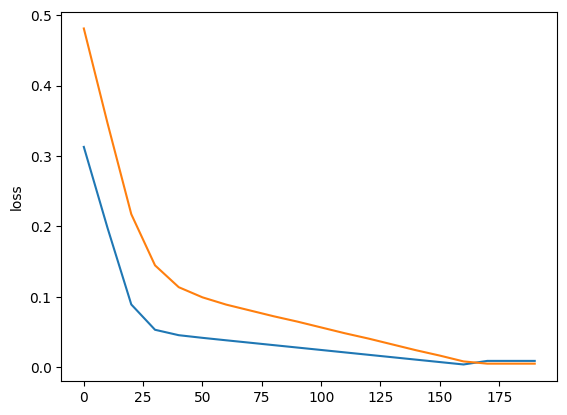

In [ ]:
# plotting the loss curves
import numpy as np    # matplotlib only works with numpys

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label = "test loss")
plt.ylabel("loss")

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

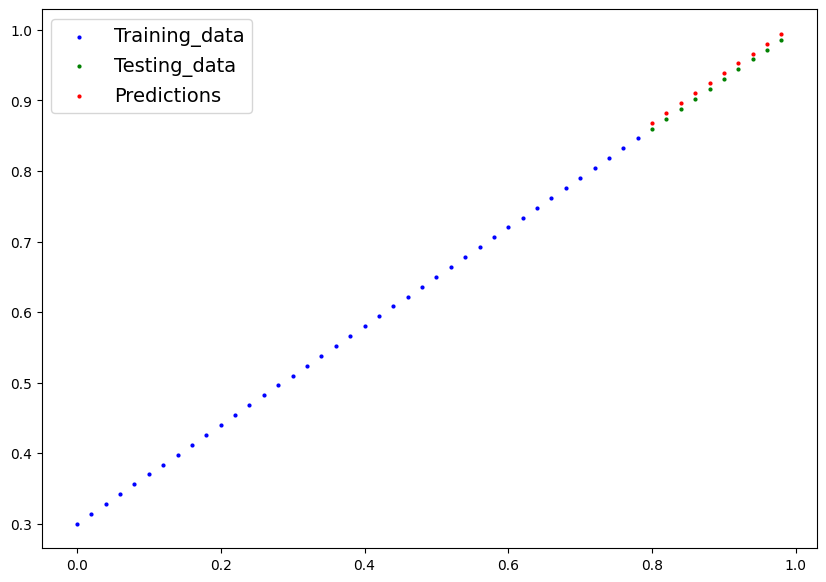

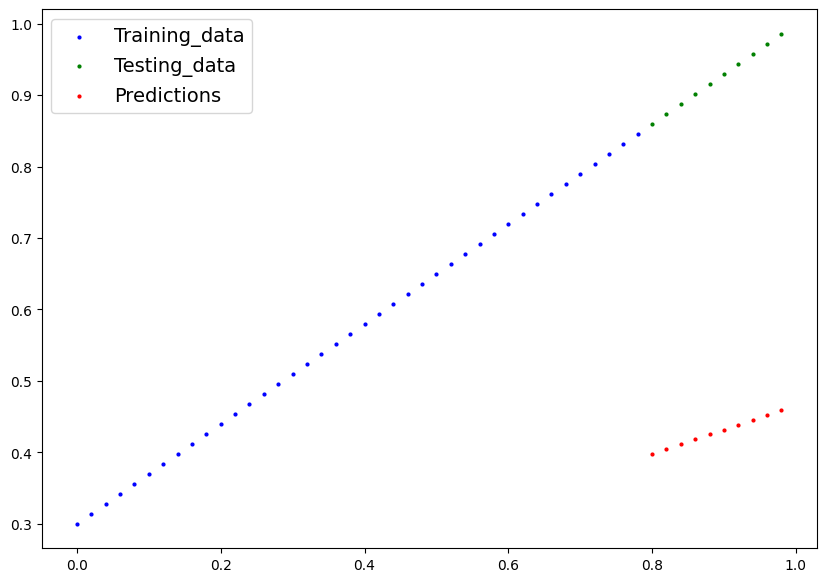

In [ ]:
plot_predictions(predictions = y_preds_new)
plot_predictions(predictions = y_preds)

In [ ]:
model_0.state_dict()      # after every loop our weights and bias are coming closer to the ideal value and loss is decreasing

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Saving a model in PyTorch

there are three main methods for saving and loading models

1. 'torch.save()' - allows you to save in pythons pickle format
2. 'torch.load()' - allows you to save pytorch object
3. 'torch.nn.module.load_state_dict()' - allows you to save model in state_dict

In [ ]:
from pathlib import Path

# create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME = "01_pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state_dict
torch.save(obj = model_0.state_dict(),
           f=MODEL_SAVE_PATH)

## Loading a Pytorch model



In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Load the saved state_dict of model_0
state_dict = torch.load(MODEL_SAVE_PATH)

loaded_model_0 = LinearRegressionModel()

# Now load the state_dict using the proper method
loaded_model_0.load_state_dict(state_dict)


<All keys matched successfully>

In [ ]:
# make predictions with loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# make model preds
model_0.eval()
with torch.inference_mode():
  model_0_preds = model_0(X_test)
model_0_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# compare the models
model_0_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together
##6.1 Data

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
# create some data using linear regression model
weight = 0.7
bias = 0.3

#create X and y (features and labels)
X = torch.arange(0,1,0.02)
y = weight*X +bias
print(len(X),len(y))

50 50


In [ ]:
# Train and test split 80/20
train_split = int(len(X)*0.8)
X_test, y_test = X[train_split:], y[train_split:]
X_train, y_train = X[:train_split], y[:train_split]
print (len(X_train),len(X_test),len(y_train),len(y_test))

40 10 40 10


In [ ]:
# visualizing the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

#plots training data , test data and compares predictions.


  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training_data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing_data")

  # Are there predictions
  if predictions is not None :
    #plot predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4 , label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});


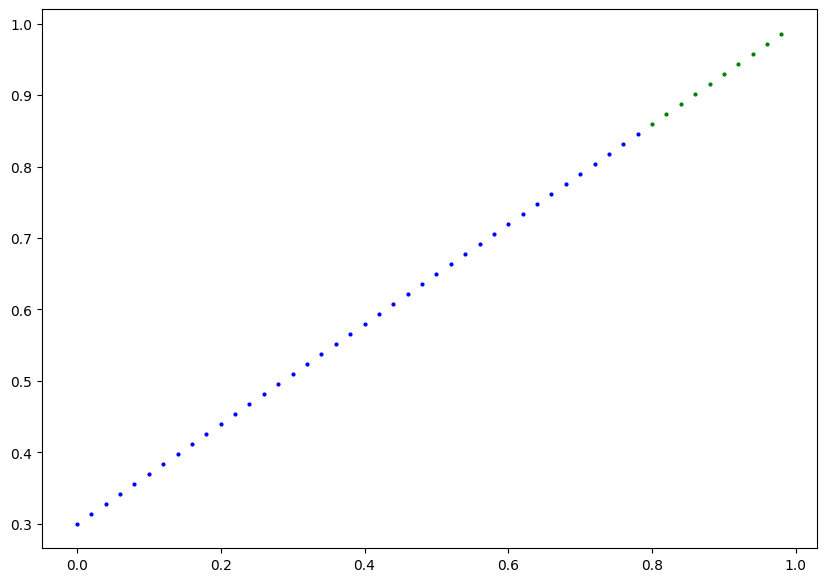

In [ ]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)